In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [187]:
df=pd.read_csv('insurance.csv')

In [188]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Text(0.5, 1.0, 'Podział na palących i niepalących')

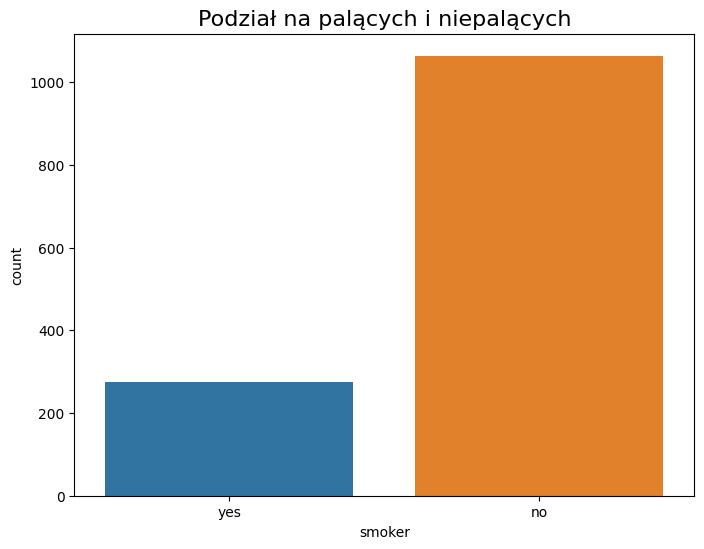

In [189]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoker', data=df)
plt.title('Podział na palących i niepalących', fontsize=16)

In [190]:
df['age_description']=pd.cut(df['age'], bins=[18,25, 35, 50, 64], labels=['młodzi_dorośli', 'starsi_dorośli', 'średni_wiek', 'seniorzy' ])

Text(0.5, 1.0, 'Kategoria wiekowa')

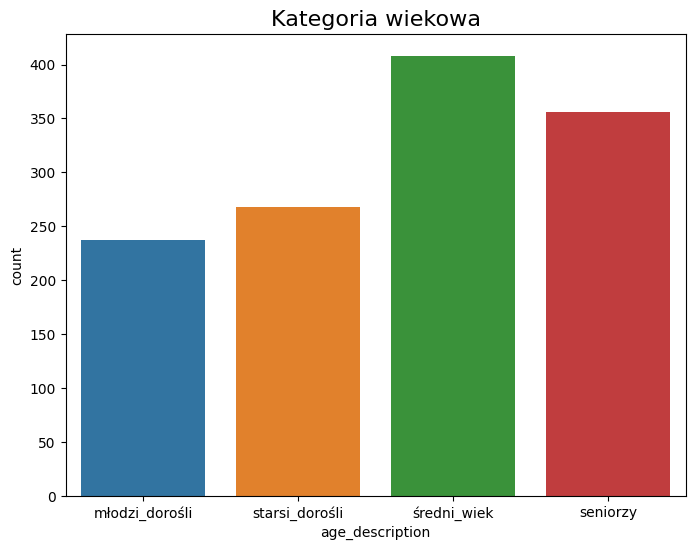

In [191]:
plt.figure(figsize=(8,6))
sns.countplot(x='age_description', data=df)
plt.title('Kategoria wiekowa', fontsize=16)

<AxesSubplot:xlabel='age_description', ylabel='charges'>

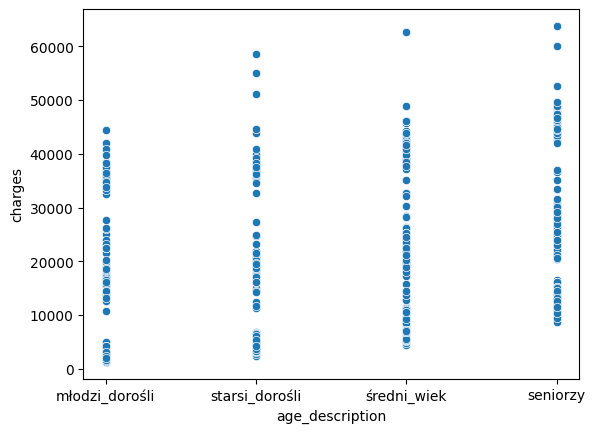

In [192]:
sns.scatterplot(x='age_description', y='charges', data=df)

<AxesSubplot:xlabel='age_description', ylabel='charges'>

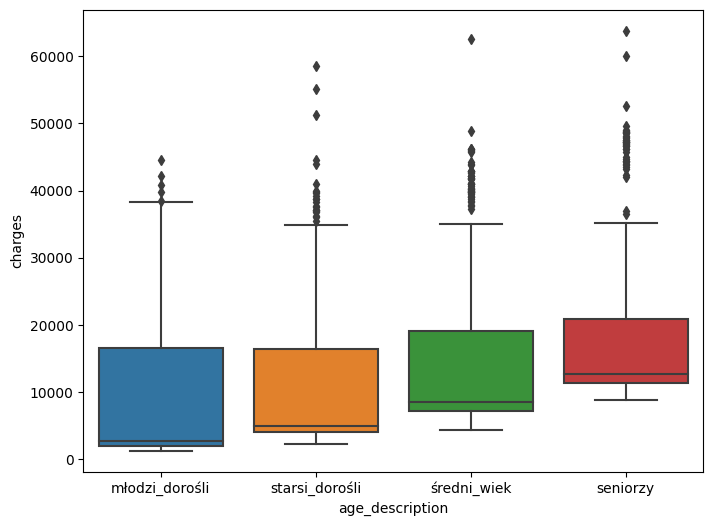

In [193]:
plt.figure(figsize=(8,6))
sns.boxplot(x='age_description', y='charges', data=df)

In [194]:
df['female'] = df['sex'].replace({'female': 1, 'male': 0})
del df['sex']
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

In [195]:
df['region'] = df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast':3})

### Co ma wpływ na wysokość ubezpieczenia? 

<AxesSubplot:xlabel='region', ylabel='charges'>

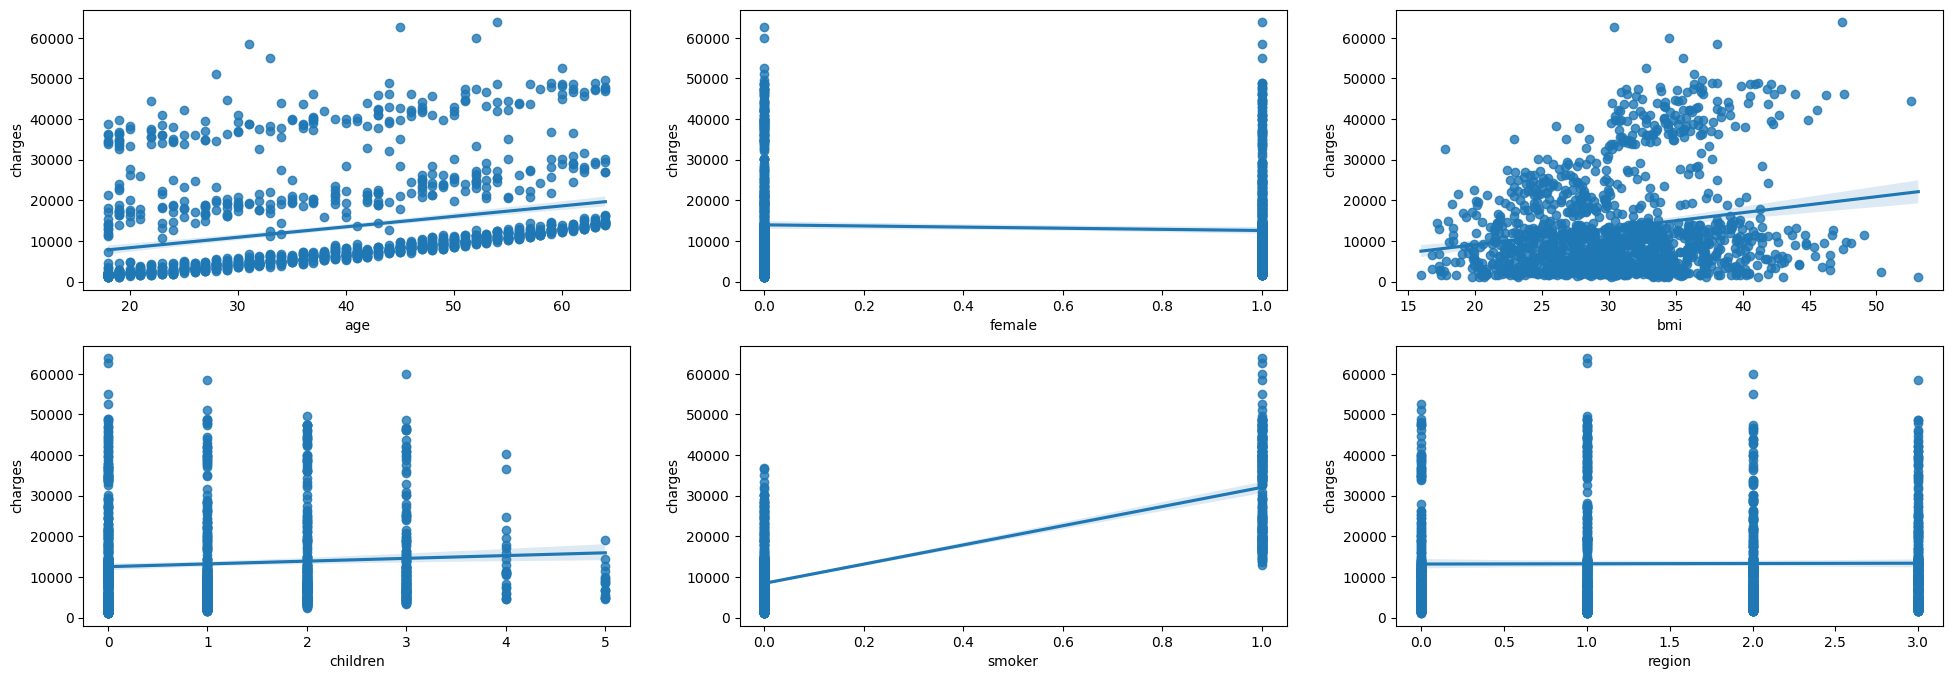

In [196]:
figure, ax = plt.subplots(2,3, figsize=(24,8))
sns.regplot(x=df["age"], y=df["charges"], ax=ax[0,0])
sns.regplot(x=df["female"], y=df["charges"], ax=ax[0,1])
sns.regplot(x=df["bmi"], y=df["charges"], ax=ax[0,2])
sns.regplot(x=df["children"], y=df["charges"], ax=ax[1,0])
sns.regplot(x=df["smoker"], y=df["charges"], ax=ax[1,1])
sns.regplot(x=df["region"], y=df["charges"], ax=ax[1,2])

Wiek ma wpływ, ale jest dużo wyjątków. Płeć ma minimalny wpływ. BMI ma wpływ. Liczba dzieci ubezpieczonych jest dość niska, ma jakiś wpływ na wysokość ubezpieczenia. Palenie wpływa na wysokość ubezpieczenia. Region nie ma znaczenia. 

In [197]:
del df['region']

## Zbiór treningowy i testowy

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split


#### Opłaty to Y, reszta danych X

In [199]:
X = df[['age', 'female', 'bmi', 'children', 'smoker']]
y = df['charges']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [201]:
X_train.index

Int64Index([ 196, 1209,  353,  461,  629,  850,  999,  522,  974,  599,
            ...
             330, 1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1126],
           dtype='int64', length=1204)

In [202]:
X_test.index

Int64Index([ 764,  887,  890, 1293,  259, 1312,  899,  752, 1286,  707,
            ...
             832,  309,  415, 1052,  654,  358,  551,  778, 1127,   81],
           dtype='int64', length=134)

In [203]:
set(X_train.index).intersection(X_test)

set()

In [204]:
X_train.shape

(1204, 5)

In [205]:
X_test.shape

(134, 5)

#### Uczenie modelu

In [206]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [207]:
model.intercept_

-11987.311073953235

In [208]:
model.coef_

array([  259.54626405,   254.23355399,   314.14334498,   446.78353836,
       23915.23937267])

#### Prognoza

In [209]:
# X = df[['age', 'female', 'bmi', 'children', 'smoker']]

In [210]:
y_predict = model.predict(X_test)
print(pd.Series(y_predict, index=y_test.index))

764      8748.630149
887      7041.171202
890     37238.866582
1293     9379.788104
259     26886.762887
            ...     
358      7148.000587
551      5660.569900
778      9218.558383
1127     9509.789150
81      11973.482325
Length: 134, dtype: float64


In [211]:
predict_data = np.array([[45, 1, 25, 1, 1], [45, 0, 25, 1, 1]])
predict_data

array([[45,  1, 25,  1,  1],
       [45,  0, 25,  1,  1]])

In [212]:
model.predict(predict_data)

C:\Users\izabela.wegierkiewic\Miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32162.11089778, 31907.87734379])

In [213]:
X.values

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ]])

In [214]:
r2_score(y_true=y_test, y_pred=y_predict)

0.7622204758053099

###### R2 w walidacji krzyżowej

In [215]:
lr = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(estimator=lr, X=X, y=y, cv=cv)
r2_scores

array([0.78113021, 0.74036741, 0.79510233, 0.63211312, 0.75095408])

In [216]:
lr = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
preds = cross_val_predict(estimator=lr, X=X, y=y, cv=cv)
preds

array([25785.56737336,  3700.08596904,  7180.86255701, ...,
        4693.05076525,  1652.07164312, 37656.10893936])

In [217]:
results = pd.DataFrame(columns=['real', 'predict'])
results['real'] = y
results['predict'] = preds
results

,real,predict
0,16884.92400,25785.567373
1,1725.55230,3700.085969
2,4449.46200,7180.862557
3,21984.47061,3638.045108
4,3866.85520,5253.511065
...,...,...
1333,10600.54830,12251.929723
1334,2205.98080,2674.091475
1335,1629.83350,4693.050765
1336,2007.94500,1652.071643


## Drzewo decyzyjne

In [228]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import matplotlib.pyplot as plt

In [229]:
X = df[['age', 'female', 'bmi', 'children', 'smoker']]
y = df['charges']

In [259]:
model = DecisionTreeRegressor(max_depth=3, min_samples_split=3)
model.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [260]:
predict_data = np.array([[45, 1, 25, 1, 1], [45, 0, 25, 1, 1]])
predict_data

array([[45,  1, 25,  1,  1],
       [45,  0, 25,  1,  1]])

In [261]:
model.predict(predict_data)

C:\Users\izabela.wegierkiewic\Miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([25077.11276982, 25077.11276982])

In [262]:
model.get_depth()

3

In [263]:
model.get_n_leaves()

8

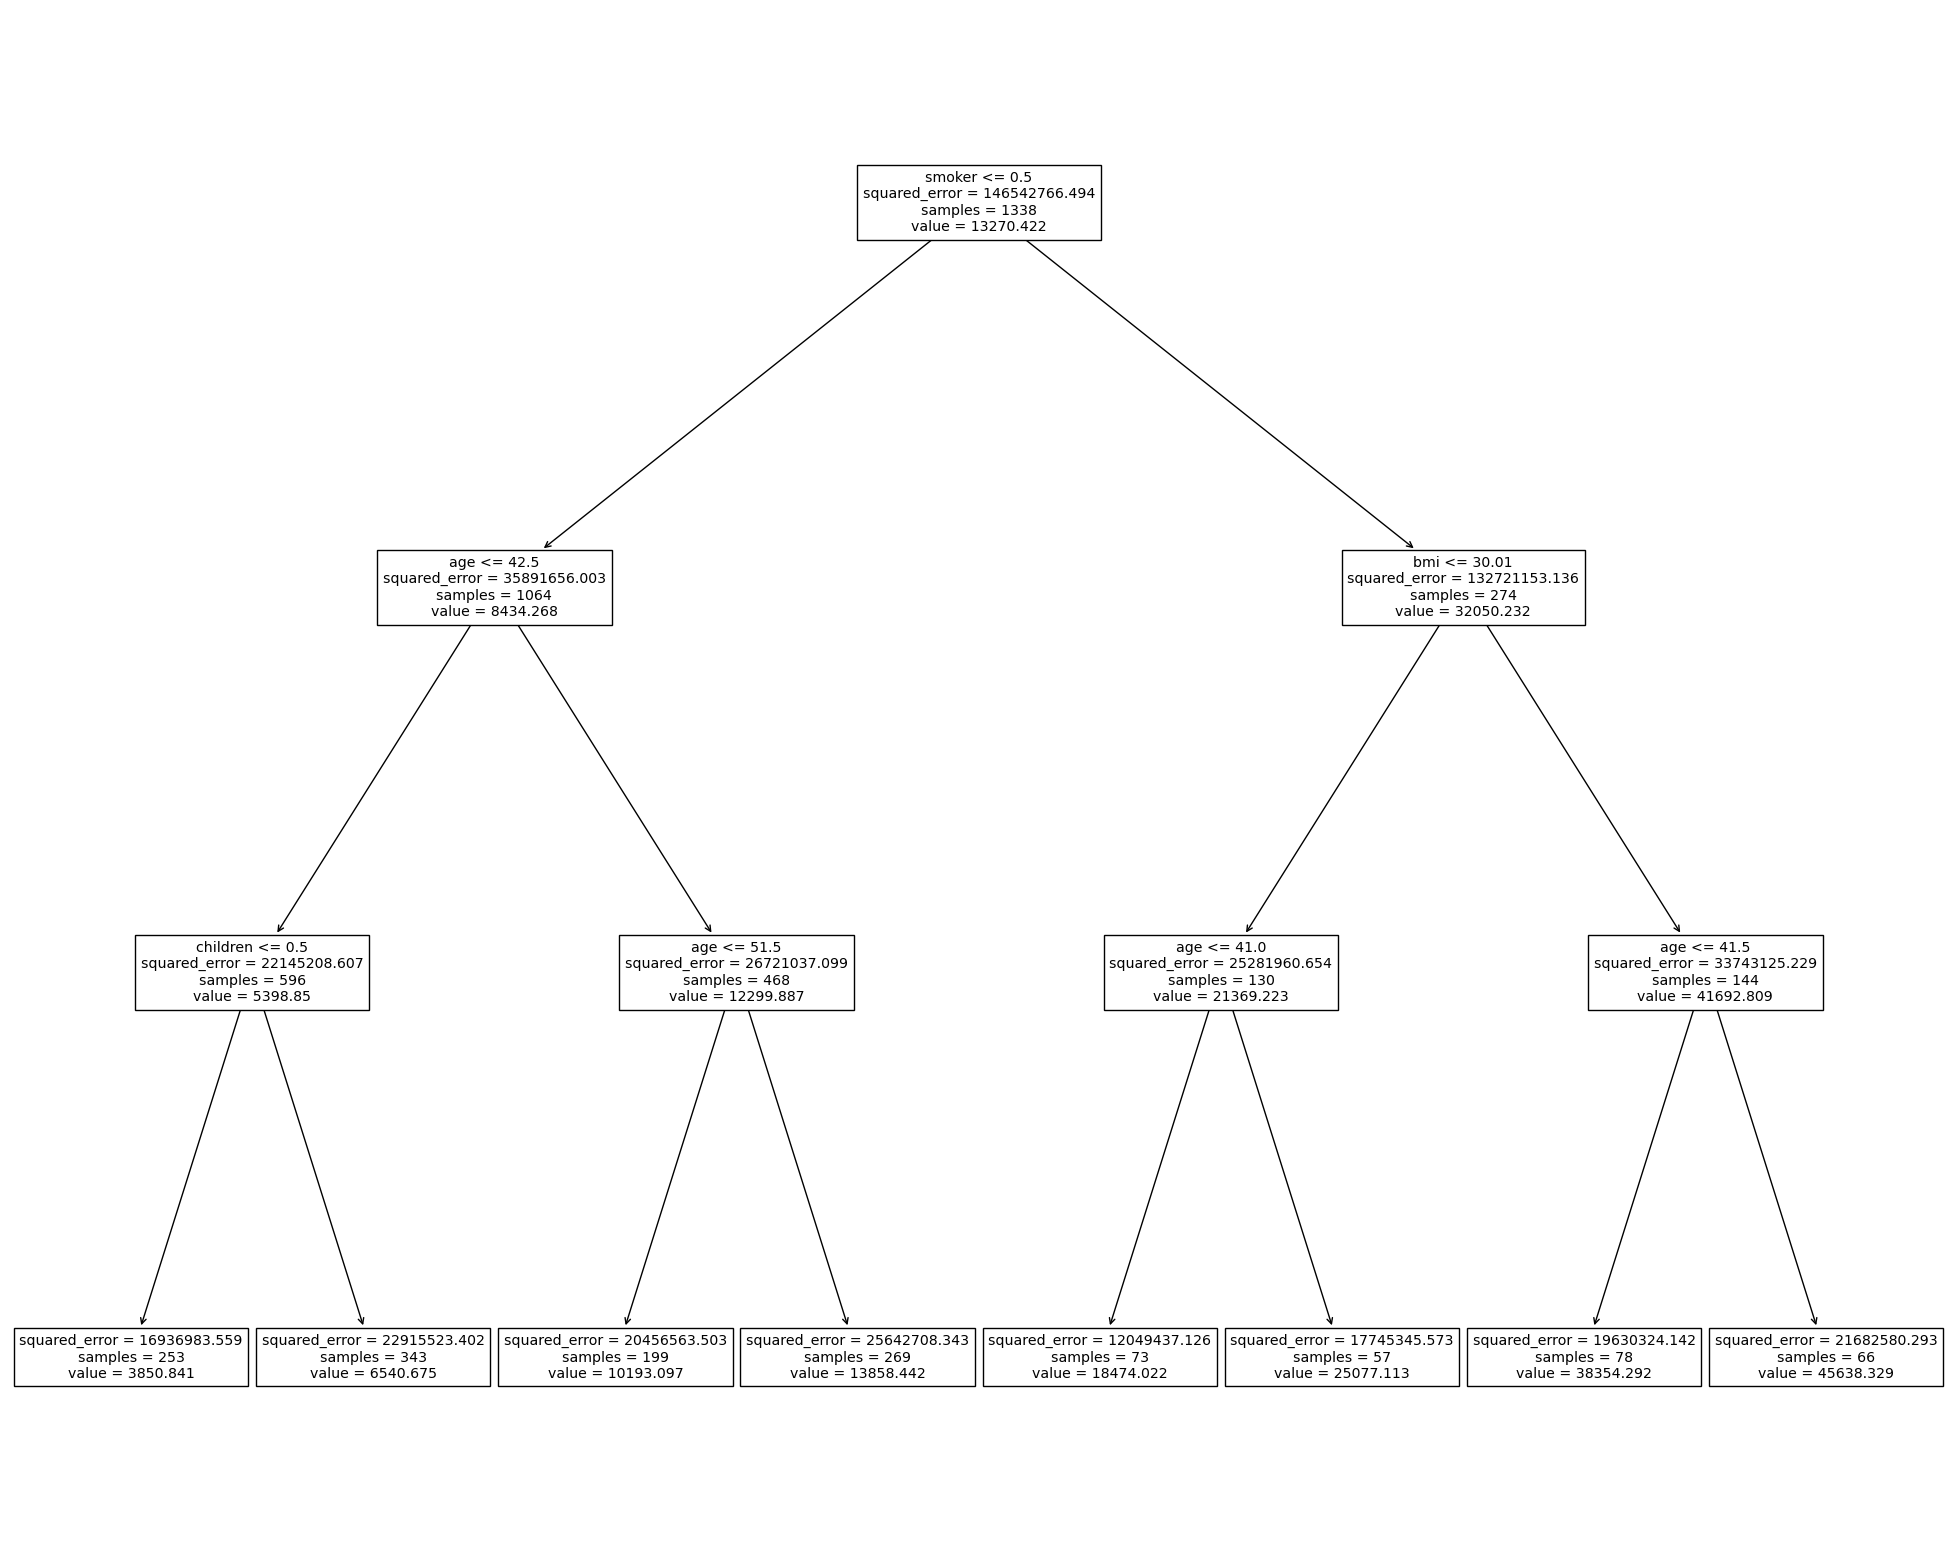

In [264]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names=X.columns, class_names='price')
fig.savefig('decision.tree.png', dpi=400)